In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import dask.dataframe as dd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
chunk_size = 10**6

In [3]:
# read batch_task table

# with pd.read_csv(batch_task_data_path, chunksize=chunk_size, iterator=True) as reader:
#     for chunk in reader:
#         df = pd.DataFrame(chunk)
#         dfs.append(df)
# batch_task_dataframe = pd.concat(dfs)
batch_task_data_path = 'data/batch_task.csv'
bt_headers=['task_name','instance_num', 'job_name', 'task_type', 'status', 'start_time', 'end_time', 'plan_cpu', 'plan_mem']
dfs = []
with pd.read_csv(batch_task_data_path, 
    # dtype={
    #     'task_name': 'string',
    #     'instance_num': 'Int64',
    #     'job_name': 'string',
    #     'task_type': 'string',
    #     'status': 'string',
    #     'start_time': 'Int64',
    #     'end_time': 'Int64',
    #     'plan_cpu': 'float64',
    #     'plan_mem': 'float64'
    # },
    names=bt_headers, chunksize=chunk_size, iterator=True) as reader:
    for chunk in reader:
        df = pd.DataFrame(chunk)
        dfs.append(df)
batch_task_dataframe = pd.concat(dfs)


In [4]:
batch_task_dataframe.head(20)

,task_name,instance_num,job_name,task_type,status,start_time,end_time,plan_cpu,plan_mem
0,M1,1.0,j_1,1,Terminated,419912,419912,100.0,0.20
1,R2_1,1.0,j_2,1,Terminated,87076,87086,50.0,0.20
2,M1,1.0,j_2,1,Terminated,87076,87083,50.0,0.20
3,R6_3,371.0,j_3,1,Terminated,157297,157325,100.0,0.49
4,J4_2_3,1111.0,j_3,1,Terminated,157329,157376,100.0,0.59
5,R2_1,1.0,j_3,1,Terminated,157322,157328,100.0,0.39
6,J8_3_7,1111.0,j_3,1,Terminated,157331,157376,100.0,0.59
7,M3,12846.0,j_3,1,Terminated,157213,157295,100.0,0.30
8,R9_8,1.0,j_3,1,Terminated,157376,157381,100.0,0.39
9,R1_3,371.0,j_3,1,Terminated,157297,157322,100.0,0.49


In [5]:
batch_task_dataframe["status"].value_counts()

status
Terminated    14059143
Running         129354
Failed           83276
Waiting          23958
Name: count, dtype: int64

In [6]:
batch_task_dataframe["task_type"].value_counts()

task_type
1     12207703
6      1226388
5       399489
10      322929
8        53933
3        35061
11       28777
12        8889
9         6543
4         5519
7          488
2           12
Name: count, dtype: int64

获取running和failed，即end_time为0的数据

In [7]:
rof = batch_task_dataframe[batch_task_dataframe["end_time"]==0]

In [8]:
rof.head()

,task_name,instance_num,job_name,task_type,status,start_time,end_time,plan_cpu,plan_mem
102,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_85,6,Running,474800,0,NaN,NaN
103,task_LTE4NjUxMjg5NDY5MDI4NjAzNzU=,1.0,j_85,6,Running,474800,0,NaN,NaN
277,task_LTE4NjUxMjg5NDY5MDI4NjAzNzU=,1.0,j_189,6,Running,617172,0,NaN,NaN
668,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,NaN,j_585,6,Waiting,0,0,NaN,NaN
670,task_LTE4NjUxMjg5NDY5MDI4NjAzNzU=,NaN,j_585,6,Waiting,0,0,NaN,NaN


In [9]:
df=batch_task_dataframe.sort_values(by='start_time',ascending=True)
a=df[df["task_name"]=="task_MTM0ODUxMTY0NjQzMTI1NTc1MQ=="]
a[a["start_time"]>0]

,task_name,instance_num,job_name,task_type,status,start_time,end_time,plan_cpu,plan_mem
11174934,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_1448450,6,Terminated,85337,86127,30.0,0.05
12131124,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_2293673,6,Terminated,85540,86283,30.0,0.05
10219724,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_600204,6,Terminated,85572,86316,30.0,0.05
11782134,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_1984370,6,Terminated,85595,86345,30.0,0.05
13042148,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_3095090,6,Terminated,85620,86196,30.0,0.05
...,...,...,...,...,...,...,...,...,...
6256368,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,41.0,j_1298744,6,Terminated,691191,691304,30.0,0.05
1799547,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_1579468,6,Terminated,691192,691275,30.0,0.05
4291092,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,1.0,j_3771817,6,Terminated,691193,691205,30.0,0.05
5647629,task_MTM0ODUxMTY0NjQzMTI1NTc1MQ==,689.0,j_758497,6,Terminated,691194,691304,30.0,0.05


In [10]:
a=rof[rof["status"]=="Failed"]
a.head()

,task_name,instance_num,job_name,task_type,status,start_time,end_time,plan_cpu,plan_mem


In [11]:
batch_task_dataframe['lifetime'] = np.maximum((batch_task_dataframe['end_time'] - batch_task_dataframe['start_time']) ,300)/ 3600
batch_task_dataframe.head(20)

,task_name,instance_num,job_name,task_type,status,start_time,end_time,plan_cpu,plan_mem,lifetime
0,M1,1.0,j_1,1,Terminated,419912,419912,100.0,0.20,0.083333
1,R2_1,1.0,j_2,1,Terminated,87076,87086,50.0,0.20,0.083333
2,M1,1.0,j_2,1,Terminated,87076,87083,50.0,0.20,0.083333
3,R6_3,371.0,j_3,1,Terminated,157297,157325,100.0,0.49,0.083333
4,J4_2_3,1111.0,j_3,1,Terminated,157329,157376,100.0,0.59,0.083333
5,R2_1,1.0,j_3,1,Terminated,157322,157328,100.0,0.39,0.083333
6,J8_3_7,1111.0,j_3,1,Terminated,157331,157376,100.0,0.59,0.083333
7,M3,12846.0,j_3,1,Terminated,157213,157295,100.0,0.30,0.083333
8,R9_8,1.0,j_3,1,Terminated,157376,157381,100.0,0.39,0.083333
9,R1_3,371.0,j_3,1,Terminated,157297,157322,100.0,0.49,0.083333


In [12]:
batch_task_dataframe.describe()

,instance_num,task_type,start_time,end_time,plan_cpu,plan_mem,lifetime
count,1.427217e+07,1.429573e+07,1.429573e+07,1.429573e+07,1.423387e+07,1.423387e+07,1.429573e+07
mean,9.831307e+01,1.807325e+00,3.927258e+05,3.911476e+05,8.387472e+01,3.449222e-01,9.535403e-02
std,1.288137e+03,2.067593e+00,1.773595e+05,1.786404e+05,6.213813e+01,2.927984e-01,3.960035e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,2.000000e-02,8.333333e-02
25%,1.000000e+00,1.000000e+00,2.409490e+05,2.388710e+05,5.000000e+01,2.000000e-01,8.333333e-02
50%,1.000000e+00,1.000000e+00,3.908040e+05,3.889940e+05,1.000000e+02,3.000000e-01,8.333333e-02
75%,5.000000e+00,1.000000e+00,5.463140e+05,5.455360e+05,1.000000e+02,3.900000e-01,8.333333e-02
max,9.958300e+04,1.200000e+01,7.658800e+05,7.728230e+05,1.000000e+03,1.717000e+01,1.621906e+02


In [13]:
def StartTimePlot(df):
    # drop VMs created before observation start
    df = df[df['start_time'] > 0]
    df["start_time"] = df["start_time"] // 3600
    dataset = pd.DataFrame(df.groupby(['start_time']).size().rename("count").reset_index())
    plt.figure(figsize=(10, 5))
    plt.title("Distribution of batch task create time")
    sns.lineplot(x="start_time", y="count", data=dataset)
    plt.show()

/tmp/ipykernel_60682/1367259141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["start_time"] = df["start_time"] // 3600


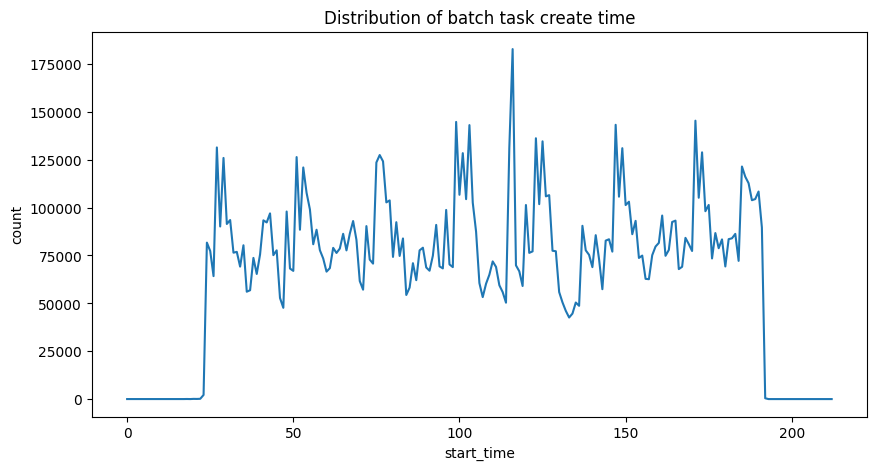

In [14]:
StartTimePlot(batch_task_dataframe)

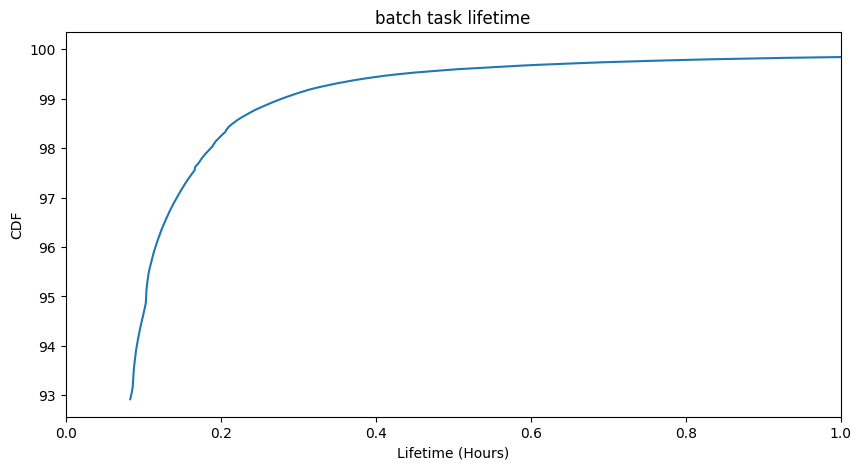

In [15]:
TraceLegend = "Alibaba Trace 2018"
def LifetimePlot(df):
    df=df[df["lifetime"] > 0]
    counts_lifetime = pd.DataFrame(df.groupby(['lifetime']).size().rename('Freq')).reset_index()
    counts_lifetime['cum'] = counts_lifetime['Freq'].cumsum() / counts_lifetime['Freq'].sum() * 100
    plt.figure(figsize=(10, 5))
    plt.title("batch task lifetime")
    ax = sns.lineplot(x="lifetime", y="cum",data=counts_lifetime)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Lifetime (Hours)')
    ax.set_ylabel('CDF')
    # zoom in
    ax.set_xlim([0,1])
    plt.show()

LifetimePlot(batch_task_dataframe)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


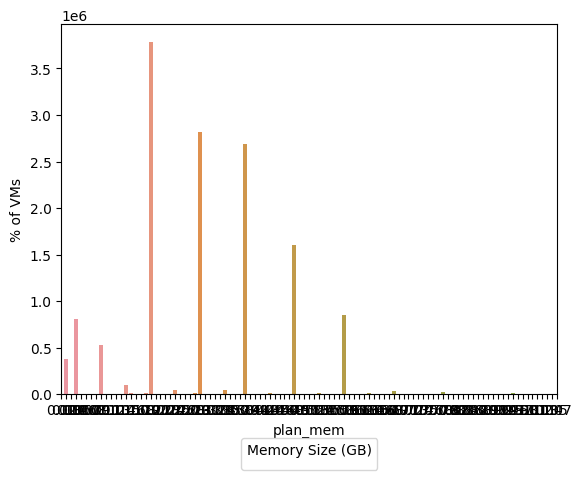

In [16]:
# 
def MemoryPlot(df):
    # dataset = (df['vmmemory'].value_counts(normalize=True)*100).sort_index().T
    # result = pd.concat([dataset], axis=0)#.fillna(0)
    # ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Memory Distribution', width=0.5, align='center')
    
    dataset = pd.DataFrame(df.groupby(['plan_mem']).size().rename('count')).reset_index()
    ax = sns.barplot(x='plan_mem',y='count',data=dataset)
    ax.legend(title='Memory Size (GB)', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
    ax.set_ylabel('% of VMs')
    ax.set_xlim([0, 100])

def CorePlot(df):
    # dataset = (df['vmcorecount'].value_counts(normalize=True)*100).sort_index().T
    # result = pd.concat([dataset], axis=0)#.fillna(0)
    # ax = result.plot.bar(stacked=True, ylim=(0,100), title='VM Cores Distribution', width=0.5, align='center')
    
    dataset = pd.DataFrame(df.groupby(['plan_cpu']).size().rename('count')).reset_index()
    ax = sns.barplot(x='plan_cpu',y='count',data=dataset)
    ax.set_ylabel('% of VMs')
    ax.legend(title='Core Count', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)

MemoryPlot(batch_task_dataframe)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


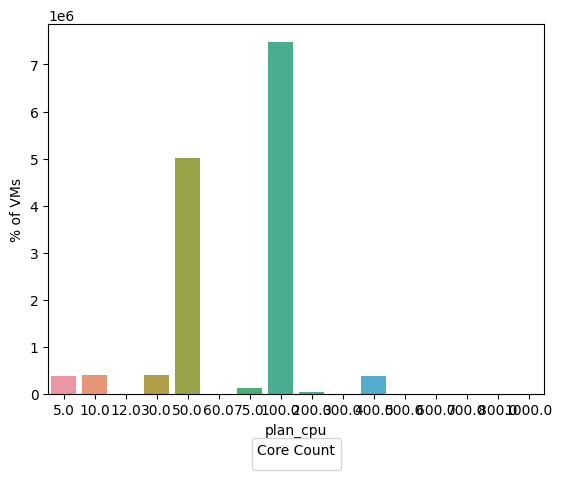

In [17]:
CorePlot(batch_task_dataframe)

In [18]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map(batch_task_dataframe)

ValueError: could not convert string to float: 'M1'